#  NLP unassessed exercises: This notebook is based on sklearn's tutorial 'Working with Text Data' with some extras and exercises

In [1]:
import sys
print(sys.executable)

D:\Anaconda4\envs\py310\python.exe


In [2]:
import pandas as pd
import sklearn

In [3]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [4]:
#Loading the 20 Newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt

In [5]:
# with a random seed, always keep it the same number each time
# for reproducibility (here 42 (=the meaning of life...))
twenty_train = fetch_20newsgroups(subset='train',categories=categories, 
                                  shuffle=True, random_state=42)

In [6]:
#fetch_20newsgroups puts the data in the .data attribute
len(twenty_train.data)

2257

In [7]:
print(twenty_train.data[0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [8]:
# Let's have a look at the first text in the collection
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [9]:
# Extracting features from text data
# Make sure you read the part of the tutorial/lecture about the bags of words
# representation

In [10]:
# A vectorizer is used to extract features from each item in the dataset
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer, which by default does some pre-processing
# tokenize (into single words/unigrams) + lower-casing
# to change these default settings look at the sklearn documentation
count_vect = CountVectorizer(min_df=1)
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [11]:
# let's see how many features we extracted (vocab size) using the CountVectorizer
print (len(count_vect.get_feature_names()))

35788


D:\Anaconda4\envs\py310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# let's see what is at position 15000 in the global vocab/feature vector
print (count_vect.get_feature_names()[15003])

furnishing


In [13]:
type(X_train_counts)

scipy.sparse._csr.csr_matrix

In [14]:
# CountVectorizer has extracted all the features for all the docs from the data
# putting them into a matrix of dimensions #instances * #features
X_train_counts.shape

(2257, 35788)

In [15]:
# To see the index of a specific word, you can use the following
count_vect.vocabulary_.get(u'furnishing')

15003

In [16]:
# With the index a look at what's in the first row/document (see printout above)
# This should be the bag of words representation for the instance
first_row = X_train_counts[0].toarray()[0]
for i in range(len((list(first_row)))):
    # only look at elements that are non-0
    if first_row[i] >0:
        # print out the index of the feature, the feature name (i.e. the word), count
        print(i, count_vect.get_feature_names()[i], first_row[i])

177 071 2
230 0hb 1
587 14 1
2326 477 2
3062 8000 1
3166 8565 1
4017 ac 2
4378 advance 1
4808 also 1
5195 any 1
5201 anyone 1
5285 application 1
8696 city 4
9031 collier 3
9338 computer 1
9801 convert 1
9805 converting 2
9932 correct 1
12014 do 1
12051 does 1
12541 ec1v 1
12833 email 2
14085 fax 1
14281 files 2
14676 format 1
14887 from 1
15576 good 1
15837 group 1
16082 hampton 1
16881 host 1
16916 hp 2
16927 hpgl 1
17302 iii 2
17366 images 1
17389 img 1
17556 in 1
18268 into 1
18474 is 1
19458 know 1
19780 laserjet 2
20198 like 1
20253 lines 1
20459 london 1
21661 michael 3
23122 nntp 1
23610 of 1
23915 organization 1
24651 pc 1
24677 pd 1
25337 please 1
25361 plotter 1
25663 posting 1
26175 programmer 1
27836 response 1
28619 same 1
29022 sd345 1
30623 standard 1
31077 subject 1
31915 tel 1
32116 tga 1
32135 thanks 1
32142 the 5
32270 this 1
32391 tif 1
32493 to 4
33256 uk 2
33572 unit 1
33597 university 2
33915 utility 1
34755 way 1
34775 we 1
35312 would 1
35416 x3769 1


# Naive Bayes

In [17]:
# Training a multinomial (beyond 2 class) NB classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, twenty_train.target)

In [18]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [19]:
# Testing on a toy dataset
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)

In [20]:
predicted = clf.predict(X_new_counts)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [21]:
# A Pipeline is an object that can carry out count 
# extraction, weighting and classification 
# all in one go- be careful you know what each part does
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),
                    ])

In [22]:
# Proper testing on the full 20newsgroups test set
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)
docs_test = twenty_test.data
text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)

In [63]:
clf.score(X_train_counts, twenty_train.target)


0.9964554718653079

# Evaluation

In [23]:
# Using the metrics package
from sklearn import metrics

# Get a classification report to see overall and per-class performance 
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.92      0.90      0.91       319
         comp.graphics       0.95      0.95      0.95       389
               sci.med       0.96      0.91      0.93       396
soc.religion.christian       0.91      0.97      0.94       398

              accuracy                           0.93      1502
             macro avg       0.93      0.93      0.93      1502
          weighted avg       0.93      0.93      0.93      1502



In [24]:
# Confusion matrix
metrics.confusion_matrix(twenty_test.target, predicted)

array([[288,   4,   3,  24],
       [  8, 370,   8,   3],
       [ 12,  13, 360,  11],
       [  5,   4,   4, 385]], dtype=int64)

In [25]:
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    cm = metrics.confusion_matrix(y_test, preds)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

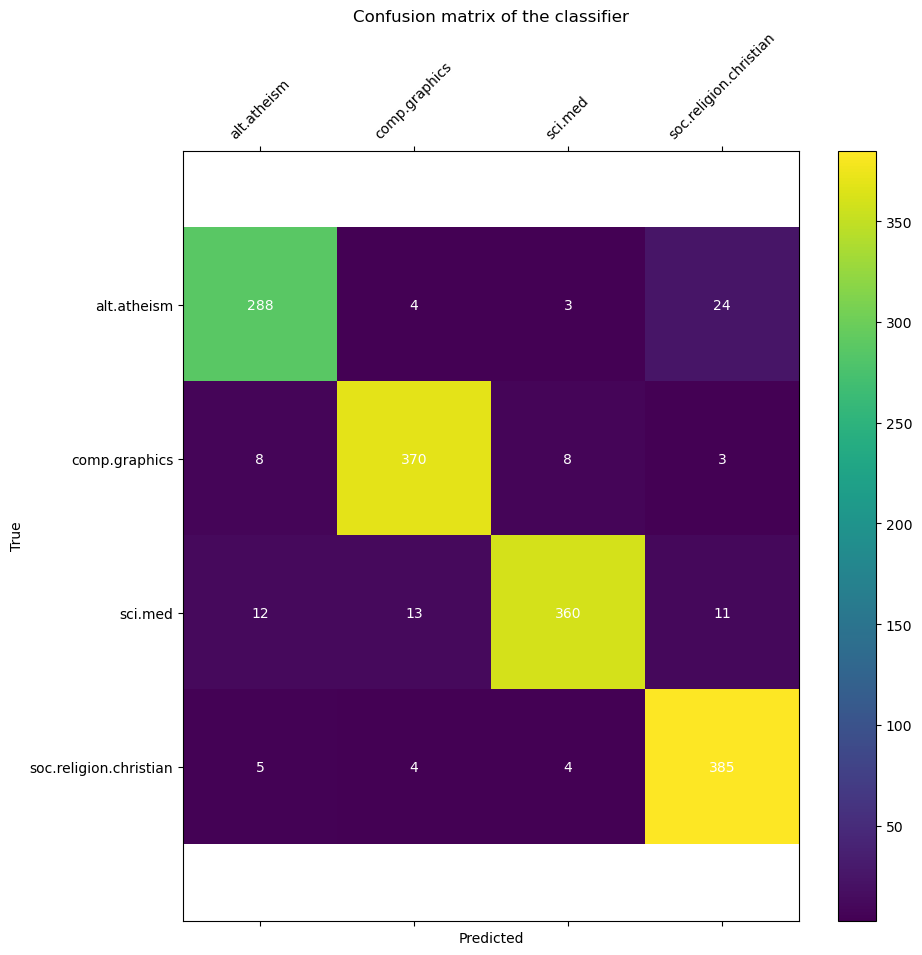

In [26]:
confusion_matrix_heatmap(twenty_test.target, predicted, twenty_test.target_names)

## Interpreting the confusion matrix
A perfect classification of this test set would be all the diagonals having the lightest colour, and everywhere else in the darkest colour (zero confusion/errors). In reality that won't happen with NLP applications worth studying.

Here there are quite a few squares outside the diagonal with moderate numbers. Notice that many alt.atheism documents were classified as soc.religion.christian, hence the lower recall for alt.atheism and lower precision for soc.religion.christian. Quite a few sci-med documents were classified as soc.religion.christian too, again affecting the precision of soc.religion.christian whilst making the recall of sci-med go down a little bit.

In [49]:
# False positive
n = 50
for label_name in twenty_train.target_names:
    count = 0
    for doc, label_idx in zip(docs_test, twenty_test.target):
        label = twenty_train.target_names[label_idx] # truth
        # twenty_train list of docs
        prediction = text_clf.predict([doc])[0] # predicted
#         print(prediction)
        
        if ((twenty_train.target_names[prediction] == label_name) and (label != label_name)):
#             print('{0} => {1}, ground truth = {2}'.format(doc, twenty_train.target_names[prediction], label))
            print('predicted: {0} <= ground truth {1}'.format(twenty_train.target_names[prediction], label))
#             n-=1
#             if n <0:
#                 break
            print('*'*50)
            count += 1
    print(label_name, count)
    

predicted: alt.atheism <= ground truth sci.med
**************************************************
predicted: alt.atheism <= ground truth comp.graphics
**************************************************
predicted: alt.atheism <= ground truth sci.med
**************************************************
predicted: alt.atheism <= ground truth sci.med
**************************************************
predicted: alt.atheism <= ground truth sci.med
**************************************************
predicted: alt.atheism <= ground truth sci.med
**************************************************
predicted: alt.atheism <= ground truth comp.graphics
**************************************************
predicted: alt.atheism <= ground truth soc.religion.christian
**************************************************
predicted: alt.atheism <= ground truth comp.graphics
**************************************************
predicted: alt.atheism <= ground truth soc.religion.christian
***********************

predicted: soc.religion.christian <= ground truth sci.med
**************************************************
predicted: soc.religion.christian <= ground truth alt.atheism
**************************************************
predicted: soc.religion.christian <= ground truth alt.atheism
**************************************************
predicted: soc.religion.christian <= ground truth alt.atheism
**************************************************
predicted: soc.religion.christian <= ground truth sci.med
**************************************************
predicted: soc.religion.christian <= ground truth alt.atheism
**************************************************
predicted: soc.religion.christian <= ground truth alt.atheism
**************************************************
predicted: soc.religion.christian <= ground truth alt.atheism
**************************************************
predicted: soc.religion.christian <= ground truth sci.med
**********************************************

In [68]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [71]:
# False negative
n = 50
for label_name in twenty_train.target_names:
    count = 0
    for doc, label_idx in zip(docs_test, twenty_test.target):
        label = twenty_train.target_names[label_idx] # truth
        # twenty_train list of docs
        prediction = text_clf.predict([doc])[0] # predicted
#         print(prediction)
        
        if ((twenty_train.target_names[prediction] != label_name) and (label == label_name)):
            print('{0} => {1}, ground truth = {2}'.format(doc, twenty_train.target_names[prediction], label))
#             print('predicted: {0} <= ground truth {1}'.format(twenty_train.target_names[prediction], label))
#             n-=1
#             if n <0:
#                 break
            print('*'*100)
            count += 1
    print(label_name, count)

From: swf@elsegundoca.ncr.com (Stan Friesen)
Subject: Re: After 2000 years, can we say that Christian Morality is
Organization: NCR Teradata Database Business Unit
Lines: 74

[This is SWF in another indirect post via Dan].

In article <1993Apr20.150829.27925@asl.dl.nec.com>,
duffy@aslss02.asl.dl.nec.com (Joseph Duffy) writes:
|> In article <1993Apr17.184948.4847@microsoft.com>
russpj@microsoft.com (Russ Paul-Jones) writes:
|> >
|> >The same way that any theory is proven false.  You examine the
predicitions
|> >that the theory makes, and try to observe them.  If you don't, or
if you
|> >observe things that the theory predicts wouldn't happen, then you
have some
|> >evidence against the theory.  If the theory can't be modified to
|> >incorporate the new observations, then you say that it is false.
|>
|> But how does one handle the nonrepeatability of the experiment? In
many types of
|> experiments the "prediction" is that the observed phenomena will
happen again
|> and be capable of bein

From: mcelwre@cnsvax.uwec.edu
Subject: FREE-ENERGY TECHNOLOGY
Organization: University of Wisconsin Eau Claire
Lines: 248
IMPORTANT-INFO: It is HUMBLY suggested by Robert's FANS that you REDIRECT all
	FOLLOWUPS into alt.fan.robert.mcelwaine, or at least CONSIDER doing so.

          
            
                            FREE-ENERGY TECHNOLOGY
                       by Robert E. McElwaine, Physicist
          
               Ninety to a hundred years ago, everybody "knew" that a 
          heavier-than-air machine could not possibly fly.  It would 
          violate the "laws" of physics.  All of the "experts" and 
          "authorities" said so. 
          
               For example, Simon Newcomb declared in 1901:  "The 
          demonstration that no possible combination of known 
          substances, known forms of machinery and known forms of 
          force, can be united in a practical machine by which man 
          shall fly long distances through the air, seems to the

From: nyeda@cnsvax.uwec.edu (David Nye)
Subject: Re: He has risen!
Organization: University of Wisconsin Eau Claire
Lines: 16

[reply to kmr4@po.CWRU.edu (Keith M. Ryan)]
 
>Our Lord and Savior David Keresh has risen!
 
>He has been seen alive!
 
>Spread the word!
 
Jeez, can't he get anything straight.  I told him to wait for three
days.
 
GOD
 
David Nye (nyeda@cnsvax.uwec.edu).  Midelfort Clinic, Eau Claire WI
This is patently absurd; but whoever wishes to become a philosopher
must learn not to be frightened by absurdities. -- Bertrand Russell
 => sci.med, ground truth = alt.atheism
****************************************************************************************************
From: dekorte@dirac.scri.fsu.edu (Stephen L. DeKorte)
Subject: Re: Genocide is Caused by Theism : Evidence?
Organization: Supercomputer Computations Research Institute
Lines: 12


I saw a 3 hour show on PBS the other day about the history of the
Jews. Appearently, the Cursades(a religious war agianst the 

From: acooper@mac.cc.macalstr.edu (Turin Turambar, ME Department of Utter Misery)
Subject: Re: Faith and Dogma
Organization: Macalester College
Lines: 123

In article <93Apr20.035421edt.47719@neat.cs.toronto.edu>, tgk@cs.toronto.edu (Todd Kelley) writes:
> In light of what happened in Waco, I need to get something of my
> chest.

Sadly understandable...

> 
> Faith and dogma are dangerous.  

Yes.

> 
> Religion inherently encourages the implementation of faith and dogma, and
> for that reason, I scorn religion.
> 
To be fair, you should really qualify this as semitic-western religions, but
you basically go ahead and do this later on anyway.

> I have expressed this notion in the past.  Some Christians debated
> with me whether Christianity leaves any room for reasoning.  I claimed
> rationality is quelled out of Christianity by faith and dogma.

Again, this should really be evaluated at a personal level.  For example, there
was only one Jesus (presumably), and he probably didn't say a

From: acooper@mac.cc.macalstr.edu (Turin Turambar, ME Department of Utter Misery)
Subject: From soc.religion.christian
Organization: Macalester College
Lines: 41



I found this little gem, I don't know if anyone has any interest/comments...


--------------------------------------------------------------------------------

Hi everyone,
           I'm a commited Christian that is battling with a problem.  I know
that romans talks about how we are saved by our faith not our deeds, yet
hebrews and james say that faith without deeds is useless, saying' You fools,
do you still think that just believing is enough?'

Now if someone is fully believing but there life is totally lead by themselves
and not by God, according to Romans that person is still saved by there faith.
But then there is the bit which says that God preferes someone who is cold to
him (i.e. doesn't know him - condemned) so a lukewarm Christian someone who
knows and believes in God but doesn't make any attempt to live by the

From: kempmp@phoenix.oulu.fi (Petri Pihko)
Subject: Re: Christian Morality is
Organization: University of Oulu, Finland
X-Newsreader: TIN [version 1.1 PL6]
Lines: 79

Dan Schaertel,,, (dps@nasa.kodak.com) wrote:

Since this is alt.atheism, I hope you don't mind if we strongly disagree...

: The fact is God could cause you to believe anything He wants you to. 
: But think about it for a minute.  Would you rather have someone love
: you because you made them love you, or because they wanted to
: love you.     The responsibility is on you to love God and take a step toward
: Him.  He promises to be there for you, but you have to look for yourself.

Indeed, "knock and it shall be opened to you". Dan, why didn't this work?
I firmly believed in god for 15 years, but I eventually realised I was
only deluding myself, fearful to face the truth. Ultimately, the only reason
what kept me believing was the fear of hell. The mental states I 
had sillily attributed to divine forces or devil's attempt

From: val@fcom.cc.utah.edu (Val Kartchner)
Subject: Re: Where did the hacker ethic go?
Organization: University of Utah Computer Center
X-Newsreader: TIN [version 1.1 PL8]
Lines: 133

VINCI (filipe@vxcrna.cern.ch) wrote:
: In article <1993May12.193454.29823@hal.com>, bobp@hal.com (Bob Pendleton) writes...
: >From article <1993May7.235404.22590@pony.Ingres.COM>, by mwmeyer@Ingres.COM (Mike (wading through the muck and) Meyer):
: >> In article <1993May7.165432.16935@hal.com> bobp@hal.com (Bob Pendleton) writes:
: >>    This is getting pretty silly. First off, "Hacker" is an obsolete term.
: >>    Doesn't matter what it used to mean, today it means "thief."
: >> 
: >> It only means "thief" if you want it to mean that.  To me, it means

:   [Lots of context wickedly omitted by myself :-) ]
: > 
: >Anyway, if I say "Joe is a hacker" to most english speaking people who
: >know the word they'll probably think he is either a poor golfer or a
: >bad carpenter. But there are very very few people

From: pstlb@aurora.alaska.edu
Subject: Where did the hacker ethic go?
Lines: 46
Nntp-Posting-Host: acad3.alaska.edu
Organization: University of Alaska Fairbanks


  A great many computer programmers read "Dr. Dobb's Journal".  In a recent
issue, there was a paragraph in an article that pained me greatly to read.  It
said:

  "There's nothing wrong if Microsoft setting the standards for the computer
industry.  The industry NEEDS an IBM for the 90's."

  Where has the hacker ethic gone?  Not the "cracker" ethic, which is something
entirely different and bad, but the hacker ethic, which tells us to value the
free distribution of information and yield to the hands-on imperative?  Why is
it that people and corporations like Bill Gates, IBM, and Intel are able to
have a virtual dead lock on the computer industry?  Why is it that, if a person
like myself posts messages to Usenet on how to get into the little nooks,
crannies, and idiosyncrasies of a computer system, they are not given any
usef

From: Frank.Neumann@arbi.informatik.uni-oldenburg.de (Frank Neumann)
Subject: Re: What has happened to DKB-L@TREARN???
Organization: University of Oldenburg, Germany
Lines: 16

Hi,
David K. Drum writes:

>listserv told me that the list doesn't exist!  So I got a global
>list of groups from the listserv and - - NOTHING!  I grepped every
>string I could think of.  If Frank, Ville Saari, Andre Beck, or anyone
>else who's a regular on DKB-L can tell me what is going on, please do!

I just sent a mail to Turgut Kalfaoglu (sp?), the maintainer of the list,
and asked him what's going on. If the list is (for whatever reason) really
dead, we might have to put up a list ourselves. But for now, I want to wait
for his answer.

Frank

PS: ...and I just thought this would be just another period of silence...
 => alt.atheism, ground truth = comp.graphics
****************************************************************************************************
From: roddi@cs.monash.edu.au (Roddi Walker)
Sub

comp.graphics 19
From: mikeq@freddy.CNA.TEK.COM (Mike Quigley)
Subject: Re: Pregnency without sex?
Keywords: pregnency sex
Organization: Tektronix, Inc., Redmond,  OR.
Lines: 13

In article <stephen.735806195@mont> stephen@mont.cs.missouri.edu (Stephen Montgomery-Smith) writes:
>When I was a school boy, my biology teacher told us of an incident
>in which a couple were very passionate without actually having
>sexual intercourse.  Somehow the girl became pregnent as sperm
>cells made their way to her through the clothes via persperation.
>
>Was my biology teacher misinforming us, or do such incidents actually
>occur?

Ohboy. Here we go again. And one wonders why the American
education system is in such abysmal shape?


 => alt.atheism, ground truth = sci.med
****************************************************************************************************
From: Stephen Dubin <sdubin@igc.apc.org>
Subject: Re: Pregnency without sex?
Nf-ID: #R:stephen.735806195@mont:2081922821:cdp:1467700

From: werckme1@eecs.uic.edu (robert werckmeister)
Subject: ECG data needed
Organization: University of Illinois at Chicago
Lines: 3

I need some ECG data , uncompressed,  hopefully in ascii format.
Don't care what it looks like, this is for a signal processing
project.
 => comp.graphics, ground truth = sci.med
****************************************************************************************************
From: kring@efes.physik.uni-kl.de (Thomas Kettenring)
Subject: Old Sermon (was: Krillean Photography)
Organization: FB Physik, Universitaet Kaiserslautern, Germany
Lines: 43

In article <C65oIL.436@vuse.vanderbilt.edu>, alex@vuse.vanderbilt.edu (Alexander P. Zijdenbos) writes:
>FLAME ON
>
>Reading through the posts about Kirlian (whatever spelling)
>photography I couldn't help but being slightly disgusted by the
>narrow-minded, "I know it all", "I don't believe what I can't see or
>measure" attitude of many people out there.
>
>I am neither a real believer, nor a disbeliever when 

From: u2nmh@csc.liv.ac.uk (N.M. Humphries)
Subject: Re: Krillean Photography
Organization: Computer Science, Liverpool University
Lines: 31
Nntp-Posting-Host: goyt.csc.liv.ac.uk
X-Newsreader: TIN [version 1.1 PL9]

Thomas Trusk (ttrusk@its.mcw.edu) wrote:

> In article <C67G01.2J1@efi.com> alanm@efi.com (Alan Morgan) writes:
> >In article <C65oIL.436@vuse.vanderbilt.edu> 
> >  alex@vuse.vanderbilt.edu (Alexander P. Zijdenbos) writes:
> >
> >>I am neither a real believer, nor a disbeliever when it comes to
> >>so-called "paranormal" stuff; but as far as I'm concerned, it is just
> >>as likely as the existence of, for instance, a god, which seems to be
> >>quite accepted in our societies - without any scientific basis.
> >
> >Oooooh.  Bad example.  I'm an atheist.
> >
> This is not flame, or abuse, nor do I want to start another thread (this
> is, after all, supposed to be about IMAGE PROCESSING).

> BUT, to say you're an atheist is to suggest you have PROOF there is NO GOD.

-- That mea

From: taob@r-node.hub.org (Brian Tao)
Subject: Re: Krillean Photography
Organization: MuGS Research and Development Facility
X-Newsreader: MuGS 3.0d16 [Apr 22 93]
To: alex@vuse.vanderbilt.edu (Alexander P. Zijdenbos)
Reply-To: taob@r-node.hub.org
Lines: 24

In article <C65oIL.436@vuse.vanderbilt.edu>, Alexander P. Zijdenbos writes...
> 
> I am neither a real believer, nor a disbeliever when it comes to
> so-called "paranormal" stuff; but as far as I'm concerned, it is just
> as likely as the existence of, for instance, a god, which seems to be
> quite accepted in our societies - without any scientific basis.

    But no one (or at least, not many people) are trying to pass off God
as a scientific fact.  Not so with Kirlian photography.  I'll admit that
it is possible that some superior intelligence exists elsewhere, and if
people want to label that intelligence "God", I'm not going to stop
them.  Anyway, let's _not_ turn this into a theological debate.  ;-)

> I am convinced that it is

From: carlson@ab24.larc.nasa.gov (Ann Carlson)
Subject: Re: FAQ essay on homosexuality
Organization: NASA Langley Research Center, Hampton, VA  USA
Lines: 20

I have some articles available on the Church and gay people, from
a pro-gay viewpoint, which might interest some of the people 
participating in this thread.  Please email me if you would like
to have me send them to you (warning, about 70k worth of material.
Make sure you have mailbox and/or disk space available.)

There are no short answers to the questions we've been seeing here
("how do you explain these verses?", "How do you justify your actions?")
If you've been asking and you really want an idea of the other people's
thinking, I encourage you to do some serious reading.  
-- 



*************************************************      
*Dr. Ann B. Carlson (a.b.carlson@larc.nasa.gov) *       O .
*MS 366                                         *         o  _///_ //
*NASA Langley Research Center                   *          <`)

From: dm112660@nevada.edu (Don Miller)
Subject: Christian Counseling/Psychology Folks out there?
Organization: Univ. Nevada, Las Vegas Grad Student, Don Miller
Lines: 20

Hello.
Hoping to net some netters
who are in the helping professions 
(counseling, psychology, psychiatry, social work, therapy etc.)
to network on some topics and consider
the possibility of a sci.counseling.christian type newsgroup
or list.

The integration of psychology and counseling and theology 
is a subject of great debate and one of particular interest
to me.

If you're out there, please lemme know.

Email me direct if you will so we can get to know one another
off the news.

Don Miller
UNLV
dm112660@helios.nevada.edu
 => sci.med, ground truth = soc.religion.christian
****************************************************************************************************
From: lisa@ux1.lbl.gov (lisa stewart)
Subject: Christian Embassy in DC
Reply-To: lisa@ux1.lbl.gov
Organization: Lawrence Berkeley Laboratory
Line

# Exercise 1: Error analysis of False Positives

Performing error analyses is a key part of improving your NLP applications. 

Iterate over the twenty_test.data and, using the list of predictions and labels, print out all the instances where there is a false positive error for that class (i.e. a false positive is where the label is predicted for a given instance, but this is not the corresponding ground truth label). Format the print-out to make it as clear as possible what the correct label and incorrect prediction are for each wrongly classified text. 

HINT: This may be achieved most easily by editing the cell above beginning with the comment `# Print out some predictions against the labels`.

For each example of a given class being predicted as a False Positive, think about which features could be added to reduce the number of these errors and write a summary of the patterns you see for each class wrongly predicted (e.g. when alt.atheism is wrongly predicted). The idea is to try to understand where and why the classifier mistakenly classifies something as a certain class when it is not of that class and try to find out why it is getting confused? Think about trying some ways to get rid of these errors based on extra features (meta-features like document length, different types of pre-processing, feature extraction etc.).

# Exercise 2: Error analysis of False Negatives
Do the same as in Exercise 1 but for False Negatives (note the incorrect predictions will be the same as in Exercise 1, but identifying the classes for which this will be an error will be different). 

For each class for which there are False Negatives, think about which features could be added to reduce the number of these errors.  The idea is to try to understand where and why the classify mistakenly misses something as being of a certain class.